In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import accuracy_score,precision_score, f1_score, cohen_kappa_score, recall_score, classification_report, roc_curve, precision_recall_curve, confusion_matrix, f1_score, average_precision_score
import numpy as np
from inspect import signature
from sklearn.ensemble import RandomForestClassifier
from sklearn.externals import joblib
from sklearn import metrics
import pydotplus
from sklearn import model_selection
from sklearn.ensemble import AdaBoostClassifier, VotingClassifier
from sklearn.metrics import classification_report


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


## 1. Prepare Data

In [2]:
X_train_resampled = pd.read_csv("../3. Data Preparation/X_train_resampled.csv", index_col=0)
X_train_resampled.shape

(1848, 30)

In [3]:
y_train_resampled = pd.read_csv("../3. Data Preparation/y_train_resampled.csv", index_col=0)
y_train_resampled.shape


(1848, 1)

In [4]:
X_val = pd.read_csv("../3. Data Preparation/X_val.csv", index_col=0)
X_val.shape

(56962, 30)

In [5]:
y_val = pd.read_csv("../3. Data Preparation/y_val.csv", index_col=0, header=0)
y_val.shape

(56962, 1)

In [6]:
target_names=['Not Fraud 0', 'Fraud 1']

## 2. Load Best Models

In [7]:
randomForestOOB12 = joblib.load('../5. Modeling - Random Forest/RandomForest (OOB_12 Features - Optimal Parameters).pkl')

In [8]:
adaBoostAllFeatures = joblib.load('../7. Modeling - DecisionTree AdaBoost/AdaBoost Classifier.pkl')

In [15]:
xgb = joblib.load('../9. XBoost/XGBoost.pkl')

## 3. Ensemble Vote Classifier

In [16]:
from mlxtend.classifier import EnsembleVoteClassifier

In [17]:
eclf = EnsembleVoteClassifier(clfs=[ randomForestOOB12, adaBoostAllFeatures, xgb ], weights=[1,1,1])


labels = ['Random Forest with OOB 12', 'AdaBoost',  'XGBoost', 'Ensemble']

for clf, label in zip([randomForestOOB12, adaBoostAllFeatures, xgb , eclf  ], labels):
    scores = model_selection.cross_val_score(clf, X_train_resampled, y_train_resampled,
                                            cv=5,
                                            scoring='recall')
    print("Recall: %0.4f (+/- %0.4f) [%s]" 
          % (scores.mean(), scores.std(), label))



C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:514: DataConversionWarning: A column-vector y wa

Recall: 0.8736 (+/- 0.0370) [Random Forest with OOB 12]


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

Recall: 0.8605 (+/- 0.0313) [AdaBoost]


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Recall: 0.8767 (+/- 0.0374) [XGBoost]


C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

Recall: 0.8703 (+/- 0.0319) [Ensemble]


In [18]:
eclf.fit(X_train_resampled, y_train_resampled)
y_pred = eclf.predict(X_val)

C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Pappa\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_

## 4. Confusion Matrix

In [19]:
from sklearn.metrics import confusion_matrix

import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


np.set_printoptions(precision=2)


Confusion matrix, without normalization
[[56644   221]
 [   13    84]]


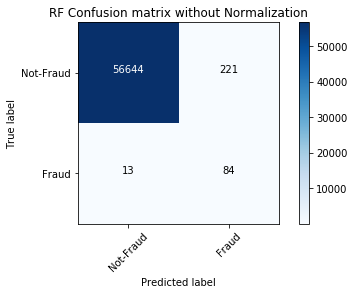

Normalized confusion matrix
[[1.   0.  ]
 [0.13 0.87]]


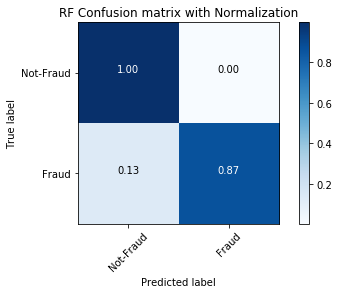

In [20]:
cm = confusion_matrix(y_val['Class'].values, y_pred)

class_names = ['Not-Fraud','Fraud']
plt.figure()
plot_confusion_matrix(cm, 
                      classes = class_names , 
                      title = 'RF Confusion matrix without Normalization')
plt.show()

plot_confusion_matrix(cm, 
                      classes = class_names , 
                      normalize = True,
                      title = 'RF Confusion matrix with Normalization')
plt.show()


## 5. Metrics Scores

In [21]:
print(classification_report(y_val['Class'].values, y_pred, target_names=target_names))

              precision    recall  f1-score   support

 Not Fraud 0       1.00      1.00      1.00     56865
     Fraud 1       0.28      0.87      0.42        97

    accuracy                           1.00     56962
   macro avg       0.64      0.93      0.71     56962
weighted avg       1.00      1.00      1.00     56962



In [22]:
total1=sum(sum(cm))


sensitivity1 = cm[0,0]/(cm[0,0]+cm[0,1])
print('Sensitivity : ', sensitivity1 )

specificity1 = cm[1,1]/(cm[1,0]+cm[1,1])
print('Specificity : ', specificity1)

Sensitivity :  0.9961136023916293
Specificity :  0.865979381443299


In [23]:

acc= accuracy_score( y_val['Class'].values, y_pred)
recall = recall_score(y_val['Class'].values, y_pred,  average='binary')
precision = precision_score( y_val['Class'].values, y_pred)
f1 = f1_score( y_val['Class'].values, y_pred, average='binary')
average = average_precision_score( y_val['Class'].values, y_pred)
kappa = cohen_kappa_score( y_val['Class'].values, y_pred)

print('Accuracy', acc)
print('Recall score', recall)
print('Precision', precision)
print('f1_score', f1)
print ('Average precision-recall score: {0:0.2f}'.format(average))
print('Kappa Score', kappa)

Accuracy 0.9958919981742214
Recall score 0.865979381443299
Precision 0.2754098360655738
f1_score 0.417910447761194
Average precision-recall score: 0.24
Kappa Score 0.41640243938213495


In [24]:
result = pd.read_csv("../Results/model_Result_final.csv", index_col=0)

In [25]:
model_Results = pd.DataFrame([['Ensemble Classifier with best model(recall)', acc, precision, recall, f1, average, kappa, specificity1, sensitivity1]],
               columns = ['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'Average', 'Kappa Cohen', 'Specificity', 'Sensitivity'])

In [26]:
result.columns

Index(['Accuracy', 'Average', 'F1 Score', 'Kappa Cohen', 'Model', 'Precision',
       'Recall', 'Sensitivity', 'Specificity'],
      dtype='object')

In [27]:
x = result.append(model_Results, ignore_index=True)

In [28]:
x

,Accuracy,Average,F1 Score,Kappa Cohen,Model,Precision,Recall,Sensitivity,Specificity
0,0.996647,0.277870,0.467967,0.466641,Random Forest All Features,0.320611,0.865979,0.996870,0.865979
1,0.993908,0.174253,0.326214,0.324346,Random Forest (n=27) with OOB_9,0.200957,0.865979,0.994126,0.865979
2,0.995225,0.219926,0.387387,0.385752,Random Forest (n=35) with OOB_12,0.247839,0.886598,0.995410,0.886598
3,0.993241,0.159751,0.303797,0.301837,AdaBoost Simple Classifier,0.184211,0.865979,0.993458,0.865979
4,0.993206,0.155993,0.300181,0.298210,AdaBoost (n=15) with OOB_10,0.182018,0.855670,0.993441,0.855670
5,0.994347,0.188779,0.345528,0.343734,XGBoost Classifier,0.215190,0.876289,0.994548,0.876289
6,0.994382,0.169188,0.330544,0.328722,XGBoost Classifier Parameter Tuning,0.207349,0.814433,0.995076,0.886598
7,0.989835,0.116779,0.229028,0.226735,XGB with OOB4,0.131498,0.886598,0.990011,0.886598
8,0.995892,0.238727,0.417910,0.416402,Ensemble Classifier with best model(recall),0.275410,0.865979,0.996114,0.865979


Text(0.5,1,'Precision-Recall curve: AP=0.24')

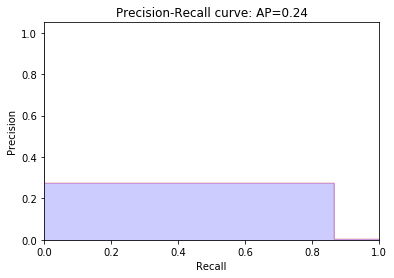

In [29]:
# plot precision-recall score


precision, recall, _ = precision_recall_curve( y_val['Class'].values, y_pred)

# In matplotlib < 1.5, plt.fill_between does not have a 'step' argument
step_kwargs = ({'step': 'post'}
               if 'step' in signature(plt.fill_between).parameters
               else {})
plt.step(recall, precision, color='r', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, alpha=0.2, color='b', **step_kwargs)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.ylim([0.0, 1.05])
plt.xlim([0.0, 1.0])
plt.title('Precision-Recall curve: AP={0:0.2f}'.format(
          average))

In [30]:
def plot_roc():
    plt.plot(fpr, tpr, label = 'ROC curve' , linewidth = 2, color= 'darkorange')
    plt.plot([0,1],[0,1], 'k--', linewidth = 2, color ='navy', linestyle='--')
    plt.xlim([0.0,0.001])
    plt.ylim([0.0,1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show();

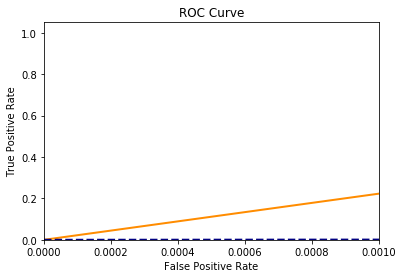

In [31]:
fpr, tpr, t = roc_curve( y_val['Class'].values, y_pred)
plot_roc()

## 6. Save Model

In [32]:


joblib.dump(eclf, 'EnsembleClassifier with Best Model(recall).pkl') 

['EnsembleClassifier with Best Model(recall).pkl']